# Problem Set 1
## Annie Bryan

### Imports

In [5]:
using Pkg
using CSV
using DataFrames
using Interact
using Plots
using Dates

### Exercise 1: Visualizing the data over time

In [6]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download(url, "covid_data.csv")
data = CSV.read("covid_data.csv")
rename!(data, 1 => "Province", 2 => "Country")
all_countries = collect(data[:,2])

256-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "Saint Kitts and Nevis"
 "Canada"
 "Canada"
 "Kosovo"
 "Burma"
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "MS Zaandam"
 "Botswana"
 "Burundi"
 "Sierra Leone"

In [7]:
countries = ["China", "Japan", "Korea, South", "US", "United Kingdom", "France", "Germany"]

7-element Array{String,1}:
 "China"
 "Japan"
 "Korea, South"
 "US"
 "United Kingdom"
 "France"
 "Germany"

In [14]:
num_days = length(names(data)[5:end])

70

In [61]:
accumulated_data = Dict()
for country in countries
    accumulated_data[country] = zeros(num_days)
end

for country in countries
    for index in 1:length(all_countries)
        if all_countries[index] == country
            for day in 1:num_days
                accumulated_data[country][day] += data[index,day+4]
            end
        end
    end
end
println(accumulated_data)

Dict{Any,Any}("Germany" => [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 4.0, 4.0, 5.0, 8.0, 10.0, 12.0, 12.0, 12.0, 12.0, 13.0, 13.0, 14.0, 14.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 17.0, 27.0, 46.0, 48.0, 79.0, 130.0, 159.0, 196.0, 262.0, 482.0, 670.0, 799.0, 1040.0, 1176.0, 1457.0, 1908.0, 2078.0, 3675.0, 4585.0, 5795.0, 7272.0, 9257.0, 12327.0, 15320.0, 19848.0, 22213.0, 24873.0, 29056.0, 32986.0, 37323.0, 43938.0, 50871.0, 57695.0, 62095.0, 66885.0, 71808.0],"United Kingdom" => [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 8.0, 8.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 13.0, 13.0, 13.0, 15.0, 20.0, 23.0, 36.0, 40.0, 51.0, 86.0, 116.0, 164.0, 207.0, 274.0, 322.0, 384.0, 459.0, 459.0, 802.0, 1144.0, 1145.0, 1551.0, 1960.0, 2642.0, 2716.0, 4014.0, 5067.0, 5745.0, 6726.0, 8164.0, 9640.0, 11812.0, 14745.0, 17312.0, 19780.0, 22453.0, 25481.0],"China" => [548.0, 643.0, 920.0, 14

[548.0, 643.0, 920.0, 1406.0, 2075.0, 2877.0, 5509.0, 6087.0, 8141.0, 9802.0, 11891.0, 16630.0, 19716.0, 23707.0, 27440.0, 30587.0, 34110.0, 36814.0, 39829.0, 42354.0, 44386.0, 44759.0, 59895.0, 66358.0, 68413.0, 70513.0, 72434.0, 74211.0, 74619.0, 75077.0, 75550.0, 77001.0, 77022.0, 77241.0, 77754.0, 78166.0, 78600.0, 78928.0, 79356.0, 79932.0, 80136.0, 80261.0, 80386.0, 80537.0, 80690.0, 80770.0, 80823.0, 80860.0, 80887.0, 80921.0, 80932.0, 80945.0, 80977.0, 81003.0, 81033.0, 81058.0, 81102.0, 81156.0, 81250.0, 81305.0, 81435.0, 81498.0, 81591.0, 81661.0, 81782.0, 81897.0, 81999.0, 82122.0, 82198.0, 82279.0]
[2.0, 2.0, 2.0, 2.0, 4.0, 4.0, 7.0, 7.0, 11.0, 15.0, 20.0, 20.0, 20.0, 22.0, 22.0, 22.0, 25.0, 25.0, 26.0, 26.0, 26.0, 28.0, 28.0, 29.0, 43.0, 59.0, 66.0, 74.0, 84.0, 94.0, 105.0, 122.0, 147.0, 159.0, 170.0, 189.0, 214.0, 228.0, 241.0, 256.0, 274.0, 293.0, 331.0, 360.0, 420.0, 461.0, 502.0, 511.0, 581.0, 639.0, 639.0, 701.0, 773.0, 839.0, 839.0, 878.0, 889.0, 924.0, 963.0, 1007.0

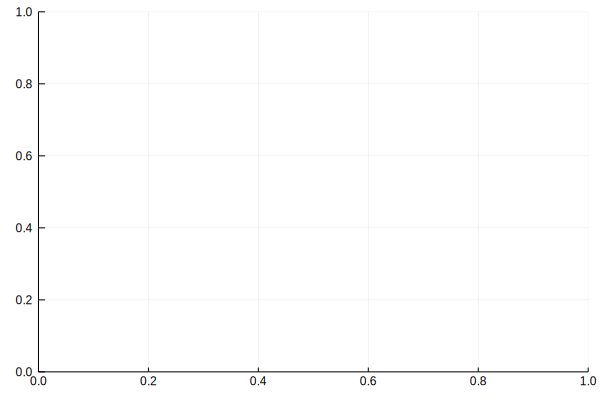

In [64]:
p = plot()

for country in countries
    println(accumulated_data[country])
end

p